In [2]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
from datetime import datetime, timedelta


### Personal Notes ###

#code here is copied from https://github.com/franchyze923/Code_From_Tutorials/blob/master/Strava_Api/strava_api.py
#im using this code as a starting point to get my data and learn about API's

### End Notes ###

print("Please enter your client id:")
id = input()

print("Please enter your refresh token:")
refresh = input()

print("Please enter your client secret:")
secret = input()

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': id,
    'client_secret': secret,
    'refresh_token': refresh,
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

print(my_dataset[0]["name"])
print(my_dataset[0]["map"]["summary_polyline"])

you entered: 578273ee1376f7b77082e6c89b91040adb092f2f
Requesting Token...

Access Token = aa3356e6edfe5ae7d4bb53e8890c6e83408a2679

Evening Ride
uyd}FnbpmPf@c@^e@B?JHZj@jBdDPf@Hp@BBPBtDDpB?vCG^CXGlABxEAp@HfTHNOFoANKfCCNOBcCEcASaCOkC@}BDIvAAHD@DDl@HZZ@j@IfAC^GNO`@{@h@]DKBKB]CoADIJG`CHhHBrCLzB@`BEbB@bBHn@JXAb@MVQPSJUB_@YyGAsBTsAXm@V_@lD_Dt@g@RGVCvCLbACrAB|@Jn@NzANz@SdAi@`Cy@~A[p@SxBiATCVBNN?t@FX~@hAf@vATxAFbBTv@rAjBh@FHHHb@FnA@~@EpAObAMt@yA~DSdAK^u@pBQ|@k@lB[`BYhCOfCITGFGDS@_B?[JaD@aCDe@XSBsLEG@WRCFAb@@bGKvSQjDEh@]xBs@tCcAfCiIlOy@tBe@lBSnBG|BJ~BZtB|@zDJRRC^Ff@j@TNNDp@@HGNm@DEZQ~@MVMJQJYHu@L[NQfAe@LOl@aAROr@Ux@E^Sn@s@TKv@KjA_AJE`AOvA]j@[^c@d@_@|AQhBgAn@c@VGT?VHRLRTl@hAd@r@LTF^BvANvAH|Ba@nIAnBRlC@jBLpBb@`DH`AE`@WxAM|BI\]r@o@l@mAh@gAH_DDcAQiBo@cAWm@A[BQ?aE{@aHy@kBa@gAq@wBoBiAw@QBIFEJi@hFKRWFq@QmBs@gBi@_@Ii@DWEa@Sc@]SCSBc@RS@{@?gAD{A\kBr@yA`@iCj@{@VSJ[Z]VIBUF}B?c@BiAZkBx@s@\SXq@pAy@tAs@v@gAdAiArAyA`Ba@~@Yf@}BrBWHoG\qAIoBc@yBw@}CeBgAe@aBe@wDs@g@SMQ]kAC[?[PmBFyBHwANiBBgAFaAXqAXkB\o@BW@i@Re@DUb

In [3]:
print(my_dataset[0]["name"])
print(my_dataset[0]["distance"])
print(my_dataset[0]["kudos_count"])
print(my_dataset[0]["max_speed"])
print(my_dataset[0]["elapsed_time"])

Grandmas marathon 
42487.6
21
4.313
13382


In [17]:
#import json

#with open ("Demo_Data.txt", "w") as fp:
    
#    json.dump(my_dataset, fp)

#print ("done?")

done?


In [5]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
from datetime import datetime, timedelta

id = 109422
secret = '1a1a3857c3f11f0da887e4bc5064162ecf575246'
refresh = '918b3db21b495d1aaddeb81147d444d8718a5c23'

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': id,
    'client_secret': secret,
    'refresh_token': refresh,
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

timeframe = "last_month"
data_type = "run" 
metric = "kudos"

# Filter activities based on the selected timeframe
if timeframe == "last_year":
    start_date = datetime.now() - timedelta(days=365)
elif timeframe == "last_month":
    start_date = datetime.now() - timedelta(days=30)
elif timeframe == "last_week":
    start_date = datetime.now() - timedelta(days=7)
else:
    # Default to last month
    start_date = datetime.now() - timedelta(days=30)

filtered_activities = [activity for activity in my_dataset if datetime.strptime(activity['start_date'], '%Y-%m-%dT%H:%M:%SZ') > start_date]

if data_type == "run":
    filtered_activities = [activity for activity in filtered_activities if activity['type'] == 'Run']
elif data_type == "bike":
    filtered_activities = [activity for activity in filtered_activities if activity['type'] == 'Ride']
else:
    filtered_activities = [activity for activity in filtered_activities if activity['type'] == 'Run']
    pass

# Calculate the total of the selected metric
cumulative_sum_list = []
cumulative_sum = 0

for activity in filtered_activities:
    if metric == "kudos":
        activity_metric = activity['kudos_count']
    elif metric == "distance":
        activity_metric = activity['distance']
    elif metric == "time":
        activity_metric = activity['moving_time']
    else:
        # Default to kudos
        activity_metric = activity['kudos_count']

    cumulative_sum += activity_metric
    cumulative_sum_list.append(cumulative_sum)

print(cumulative_sum_list)

Requesting Token...

Access Token = 6a5e381bf2fb7caeec5518c6d5cb4e60b6cf2194

[4, 10, 10, 14, 19, 27, 29, 31, 34, 36, 37, 43]


In [30]:
def data_analysis(timeframe="last_month", data_type="run", metric="distance", sum_activities = 0):
    
    auth_url = "https://www.strava.com/oauth/token"
    activites_url = "https://www.strava.com/api/v3/athlete/activities"
    
    payload = {
        'client_id': id,
        'client_secret': secret,
        'refresh_token': refresh,
        'grant_type': "refresh_token",
        'f': 'json'
    }

    print("Requesting Token...\n")
    res = requests.post(auth_url, data=payload, verify=False)
    access_token = res.json()['access_token']
    print("Access Token = {}\n".format(access_token))

    header = {'Authorization': 'Bearer ' + access_token}
    param = {'per_page': 200, 'page': 1}
    my_dataset = requests.get(activites_url, headers=header, params=param).json()

    if data_type == "run":
        filtered_activities = [activity for activity in my_dataset if activity['type'] == 'Run']
    elif data_type == "bike":
        filtered_activities = [activity for activity in my_dataset if activity['type'] == 'Ride']
    else:
        filtered_activities = [activity for activity in my_dataset if activity['type'] == 'Run']
        pass

    # Filter activities based on the selected timeframe
    if timeframe == "last_year":
        start_date = datetime.now() - timedelta(days=365)
    elif timeframe == "ytd":
        start_date = datetime(datetime.now().year, 1, 1)
    elif timeframe == "last_month":
        start_date = datetime.now() - timedelta(days=30)
    elif timeframe == "last_week":
        start_date = datetime.now() - timedelta(days=7)        
    else:
        # Default to last month
        start_date = datetime.now() - timedelta(days=30)

    if timeframe == "last_5":
        filtered_activities = [filtered_activities[0],filtered_activities[1],filtered_activities[2],filtered_activities[3],filtered_activities[4]]
    else:
        filtered_activities = [activity for activity in my_dataset if datetime.strptime(activity['start_date'], '%Y-%m-%dT%H:%M:%SZ') > start_date]

    # Calculate the total of the selected metric
    cumulative_sum_list = []
    cumulative_sum = 0

    for activity in filtered_activities:
        if metric == "kudos":
            activity_metric = activity['kudos_count']
        elif metric == "distance":
            activity_metric = activity['distance']
        elif metric == "time":
            activity_metric = activity['moving_time']
        elif metric =="average speed":
            activity_metric = activity['average_speed']
        elif metric == "max speed":
            activity_metric = activity['max_speed']
        else:
            # Default to kudos
            activity_metric = activity['kudos_count']

        #Don't sum speed metrics
        if sum_activities == 0 or metric == "average speed" or metric == "max speed":
            cumulative_sum_list.append(activity_metric)
        else:
            cumulative_sum += activity_metric
            cumulative_sum_list.append(cumulative_sum)

    return cumulative_sum_list

Requesting Token...

Access Token = 6a5e381bf2fb7caeec5518c6d5cb4e60b6cf2194



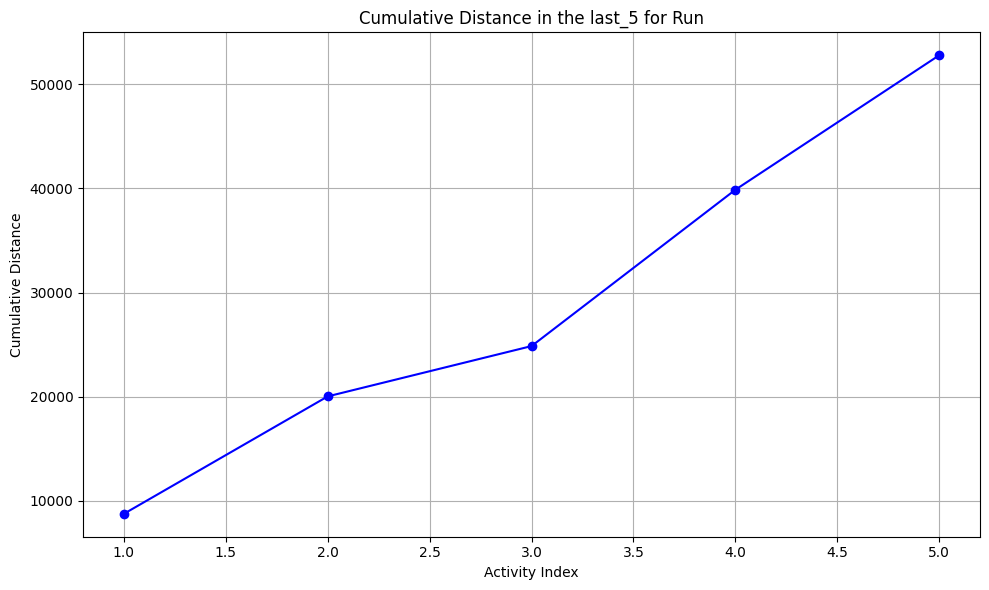

: 

In [32]:
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def plot_chart(timeframe, data_type, metric, sum_activities):
    cumulative_sum_list = data_analysis(timeframe, data_type, metric, sum_activities)

    # Define the x-axis labels (activity indices)
    x_labels = list(range(1, len(cumulative_sum_list) + 1))

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_labels, cumulative_sum_list, marker='o', linestyle='-', color='b')
    plt.xlabel('Activity Index')
    plt.ylabel(f'Cumulative {metric.capitalize()}')
    plt.title(f'Cumulative {metric.capitalize()} in the {timeframe} for {data_type.capitalize()}')
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Replace 'YOUR_CLIENT_ID', 'YOUR_CLIENT_SECRET', and 'YOUR_REFRESH_TOKEN' with your actual Strava API credentials
timeframe = "last_5"  # You can change this to "last_year" or "last_week"
data_type = "run"  # You can change this to "run" or leave it empty to include both run and bike
metric = "distance"  # You can change this to "kudos" or "distance"
sum_activities = 1
plot_chart(timeframe, data_type, metric, sum_activities)